In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
x,y=mnist['data'],mnist['target']
x.shape

(70000, 784)

So we got 70000 image and we got 784 feature as the data treat each pixel as one feature, thats mean we got 70000 image with 28x28 resolution

In [4]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

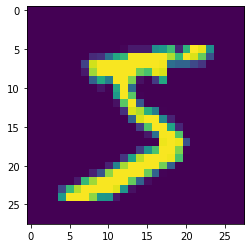

In [5]:
# we can see the first image

# it seems it is number 5
plt.imshow(x[0].reshape(28,28))

In [6]:
y=y.astype('uint8')

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

ss_split=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=0)

for train_index,test_index in ss_split.split(x,y):
  x_train,y_train=x[train_index],y[train_index]
  x_test,y_test=x[test_index],y[test_index]

In [8]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

**One Verus All classification**

 one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). 

Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the  one-versus-all  (OvA) strategy 
(also called one-versus-the-rest).

In [9]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

#Linear classifiers (SVM, logistic regression, etc.) with SGD training
ovr_classifier=OneVsRestClassifier(SGDClassifier(random_state=0))
ovr_classifier.fit(x_train,y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=0, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

# Performance Metrics

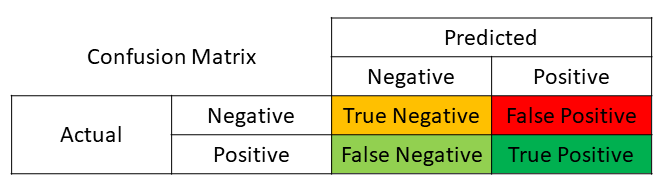

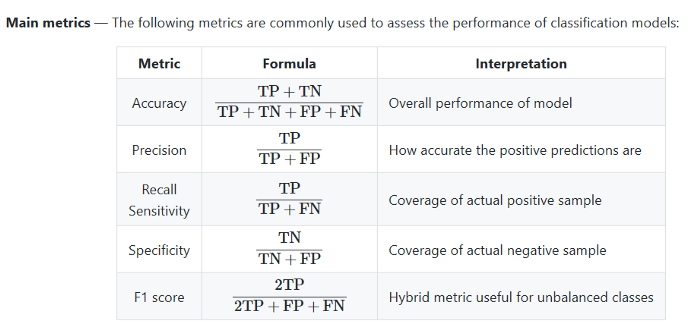

False Positive Rate (FP, Type 1 Error) and False Negative Rate(FN, Type II Error) 

In [10]:
prediction=ovr_classifier.predict(x_test)

Text(87.0, 0.5, 'Actual')

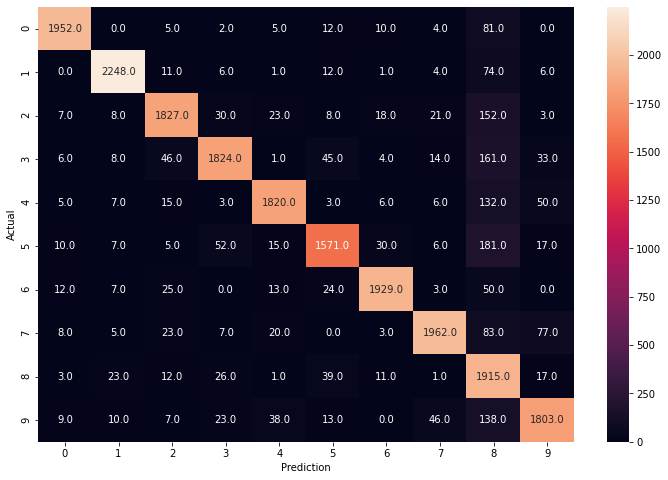

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

con=confusion_matrix(y_test,prediction)
plt.figure(figsize=(12,8))
sns.heatmap(con,annot=True,fmt='.1f')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [12]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2071
           1       0.97      0.95      0.96      2363
           2       0.92      0.87      0.90      2097
           3       0.92      0.85      0.89      2142
           4       0.94      0.89      0.91      2047
           5       0.91      0.83      0.87      1894
           6       0.96      0.94      0.95      2063
           7       0.95      0.90      0.92      2188
           8       0.65      0.94      0.76      2048
           9       0.90      0.86      0.88      2087

    accuracy                           0.90     21000
   macro avg       0.91      0.90      0.90     21000
weighted avg       0.91      0.90      0.90     21000



you can call its  decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want

In [13]:
# As 1 got highest score among other, so the model will classifier it as 1
y_score=ovr_classifier.decision_function(x_test)

In [14]:
y_score[0]

array([-1420.53109315,   194.3190298 ,   -93.8754941 ,  -213.12113381,
       -1339.86171681,  -483.61737028,  -687.10188054, -1092.89947016,
          -1.79770941,  -642.32230709])

In [15]:
for i in ovr_classifier.classes_:
  print(len(y_train[y_train==i]))

4832
5514
4893
4999
4777
4419
4813
5105
4777
4871


In [16]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

precision_score=precision_score(y_test,prediction,average=None)
recall_score(y_test,prediction,average=None)

array([0.94253984, 0.95133305, 0.87124464, 0.85154062, 0.88910601,
       0.82946146, 0.93504605, 0.89670932, 0.93505859, 0.8639195 ])

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_label=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7,8,9])

fpr={}
tpr={}
roc_auc={}

for i in range(10):
  fpr[i],tpr[i],_=roc_curve(y_test_label[:,i],y_score[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])

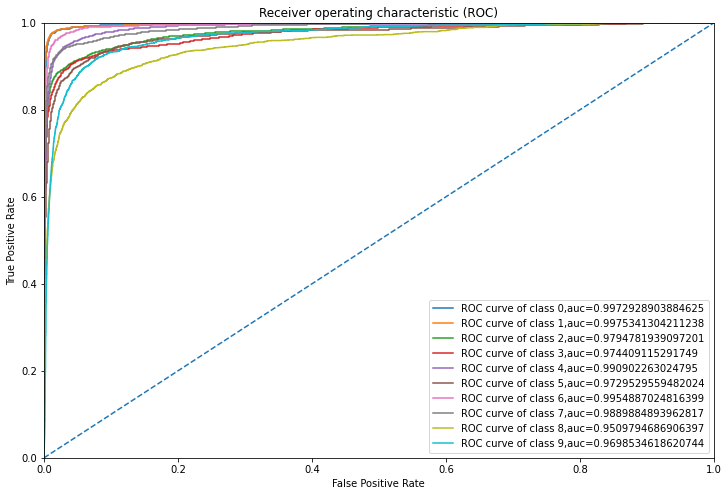

In [25]:
plt.figure(figsize=(12,8))

for i in range(10):
  plt.plot(fpr[i],tpr[i],label='ROC curve of class {},auc={}'.format(i,roc_auc[i]))

plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='best')

One way to compare classifiers is to measure the area under the curve(AUC).  A perfect classifier will have a ROC AUC equal to 1.